# Практическое задание 4. «Визуальный анализ данных»

## Задача 4.1. Работа с датасетом "house price"

### Задача 4.1.1. Скачать данные по ссылке 	[kc-house-data](https://gbcdn.mrgcdn.ru/uploads/asset/5349842/attachment/16ab1213a48b859e6e5e7407e10933ff.csv) и [laptop_price](https://gbcdn.mrgcdn.ru/uploads/asset/5349844/attachment/3b40712030489b6656a525045f3b0ed1.csv)


In [178]:
import pandas as pd
import numpy as np

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('./Урок 02/kc_house_data.csv', encoding= 'cp1251')

In [181]:
dff=pd.read_csv('./Урок 02/laptop_price.csv', encoding= 'cp1251')

### Задача 4.1.2. Изучите стоимости недвижимости

In [182]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


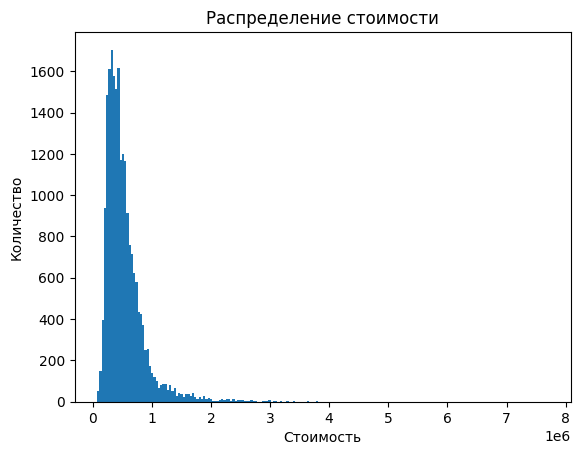

In [183]:
plt.figure()
plt.hist(df['price'], bins = 200)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Больше всего домов стоимостью около 500 000 у.е., домов со стоимость от 2 до 4 млн. очень мало.

### Задача 4.1.3. Изучите распределение квадратуры жилой площади

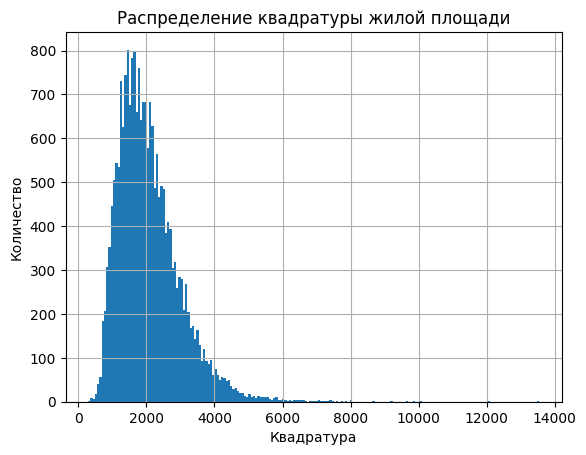

In [184]:
plt.figure()
plt.hist(df['sqft_living'], bins = 200)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура')
plt.ylabel('Количество')
plt.grid();

Больше всего домов с жилой площадью около 1500 (чем больше квадратура, тем меньше количество домов с такой площадью)

### Задача 4.1.4. Изучите распределение года постройки

    - Постройте график
    - Назовите график
    - Сделайте именование оси x и оси y
    - Сделайте выводы

In [185]:
data = df['yr_built'].value_counts().reset_index()
data

,yr_built,count
0,2014,559
1,2006,454
2,2005,450
3,2004,433
4,2003,422
...,...,...
111,1933,30
112,1901,29
113,1902,27
114,1935,24


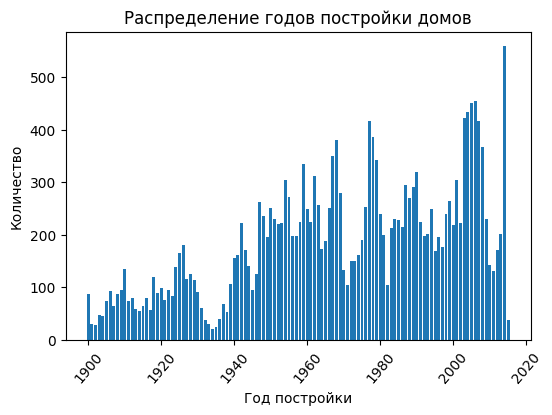

In [186]:
plt.figure(figsize =(6,4))
plt.bar(data['yr_built'],data['count'],)
plt.title('Распределение годов постройки домов')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.xticks(rotation = 50);

Примерно в 1933, 1944, 1970, 1981, 2010 годах наблюдается резкий спад по количеству построенных домов. 
Но в целом идет тенденция на увеличение количества домов с течением времени.

## Задача 4.2. Работа с датасетом "house price"

### Задача 4.2.1. Изучите распределение домов от наличия вида на набережную


In [187]:
data = df['waterfront'].value_counts() # готовим данные для графика
data

waterfront
0    21450
1      163
Name: count, dtype: int64

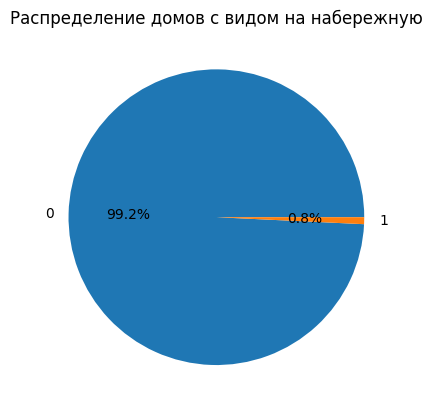

In [188]:
plt.figure()
plt.pie(data.values, labels=data.index, autopct = '%1.1f%%')
plt.title('Распределение домов с видом на набережную');

Всего 0.8% домов от всего количества имеют вид на набережную.

### Задача 4.2.2. Изучите распределение этажей домов

In [189]:
data = df['floors'].value_counts().reset_index() # готовим данные для графика
data

,floors,count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


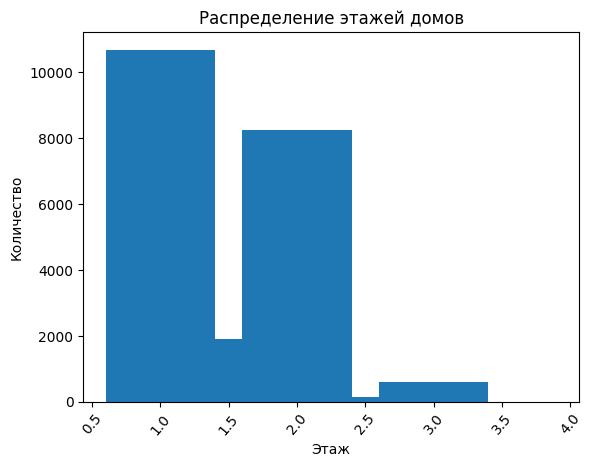

In [190]:
plt.figure()
plt.bar(data['floors'],data['count'])
plt.title('Распределение этажей домов')
plt.xlabel('Этаж')
plt.ylabel('Количество')
plt.xticks(rotation = 50);

Больше всего одноэтажных домов.
Затем идут по убыванию: двухэтажные, 1.5-этажные?, трехэтажные и 2.5-этажные.

### Задача 4.2.3. Изучите распределение состояния домов

    - Постройте график
    - Сделайте выводы

In [191]:
data = df['condition'].value_counts().reset_index() # готовим данные для графика
data

,condition,count
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


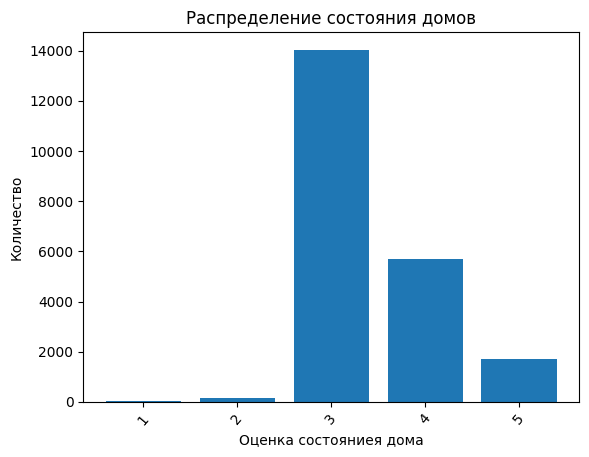

In [192]:
plt.figure()
plt.bar(data['condition'],data['count'])
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояниея дома')
plt.ylabel('Количество')
plt.xticks(rotation = 50);

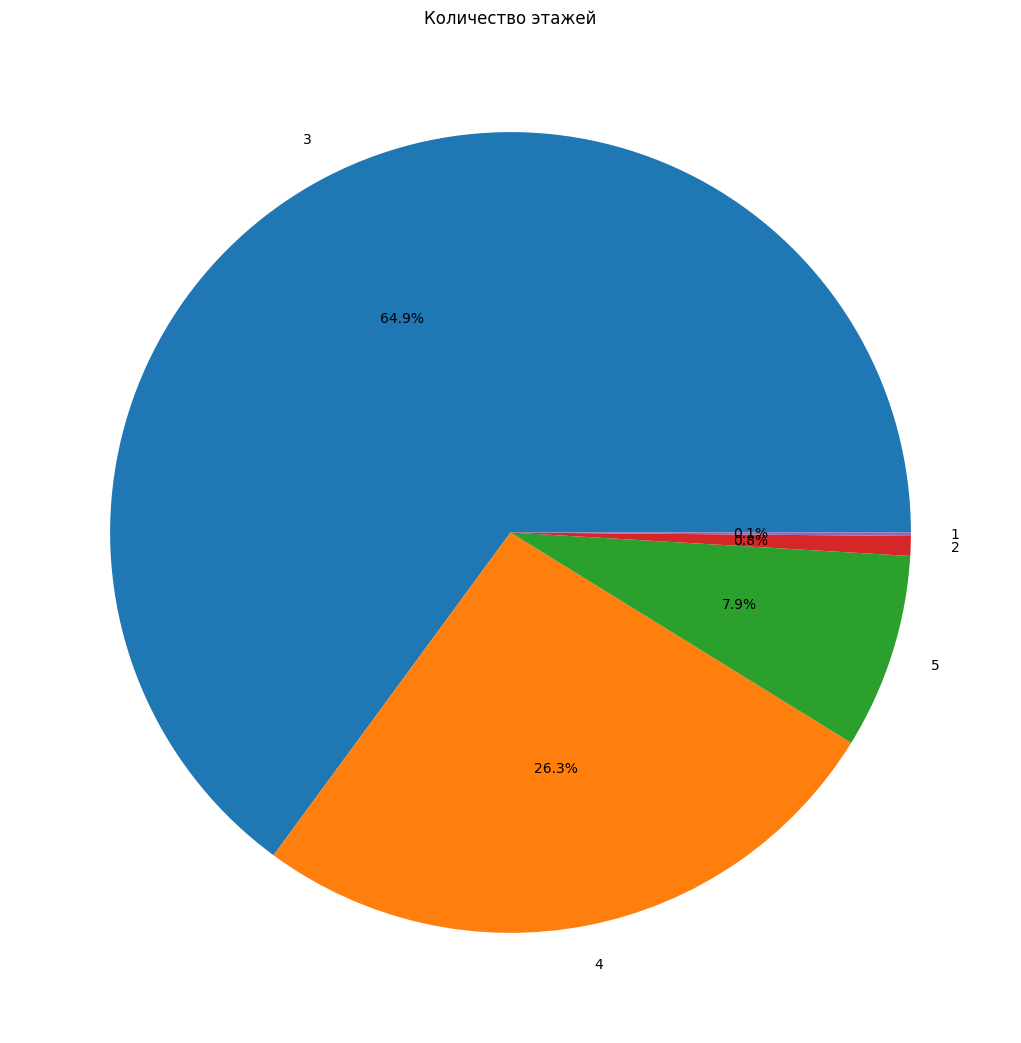

In [193]:
plt.figure(figsize=(17, 13))
plt.pie(data['count'], labels=data['condition'], autopct='%1.1f%%')
plt.title('Количество этажей');

Всего лишь **0.1%** домов в плохом состоянии. Но и в отличном состоянии не так много - **7.9%** от общего числа.
Большее количество домов в среднем состоянии, на 3-ку.


## Задача 4.3. Работа с датасетом "house price"

### Задача 4.4.1 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
    - Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [194]:
corr_matrix = df.corr(numeric_only= True) # отсеиваем только числовые данные
corr_matrix = np.round(corr_matrix,2)
corr_matrix = np.abs(corr_matrix)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.02,0.00,0.01,0.01,0.13,0.02,0.00,0.01,0.02,0.01,0.01,0.01,0.02,0.02,0.01,0.00,0.02,0.00,0.14
price,0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,0.15,0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,0.12,0.66,0.69,0.28,0.51,0.05,0.20,0.02,0.22,0.57,0.09
sqft_living,0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.06,0.76,0.88,0.44,0.32,0.06,0.20,0.05,0.24,0.76,0.18
sqft_lot,0.13,0.09,0.03,0.09,0.17,1.00,0.01,0.02,0.07,0.01,0.11,0.18,0.02,0.05,0.01,0.13,0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,0.01,1.00,0.02,0.03,0.26,0.46,0.52,0.25,0.49,0.01,0.06,0.05,0.13,0.28,0.01
waterfront,0.00,0.27,0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,0.03,0.09,0.03,0.01,0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,0.05,0.10,0.08,0.01,0.08,0.28,0.07
condition,0.02,0.04,0.03,0.12,0.06,0.01,0.26,0.02,0.05,1.00,0.14,0.16,0.17,0.36,0.06,0.00,0.01,0.11,0.09,0.00


<Axes: >

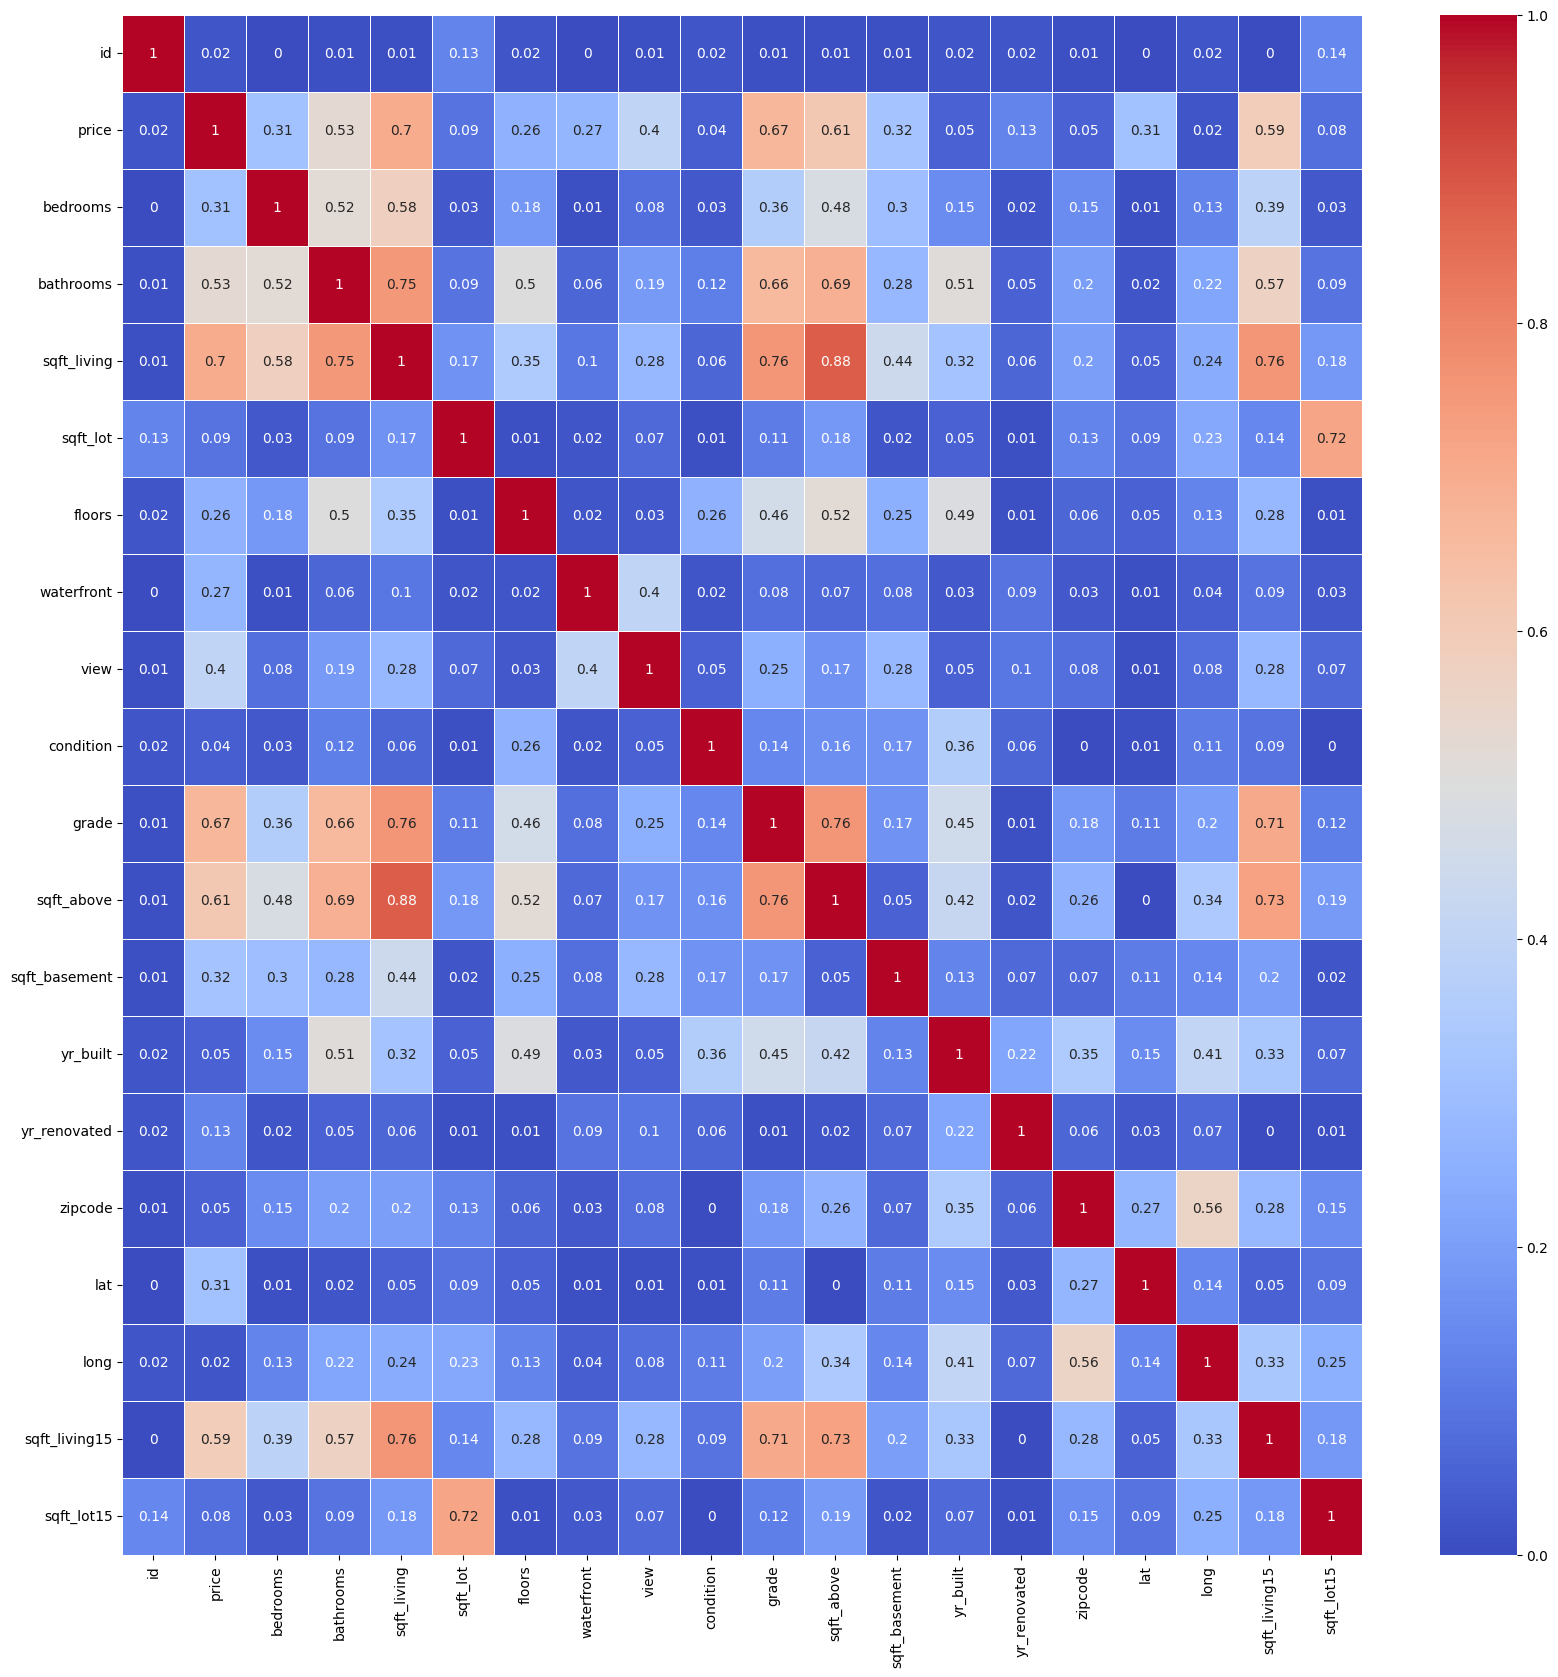

In [195]:
plt.figure(figsize=(20, 20)) # тепловая карта корреляций
sns.heatmap(corr_matrix, annot = True, linewidths=0.5, cmap='coolwarm')

1. Зависимость квадратуры площади в доме "выше земли" от общей жилой площади. 

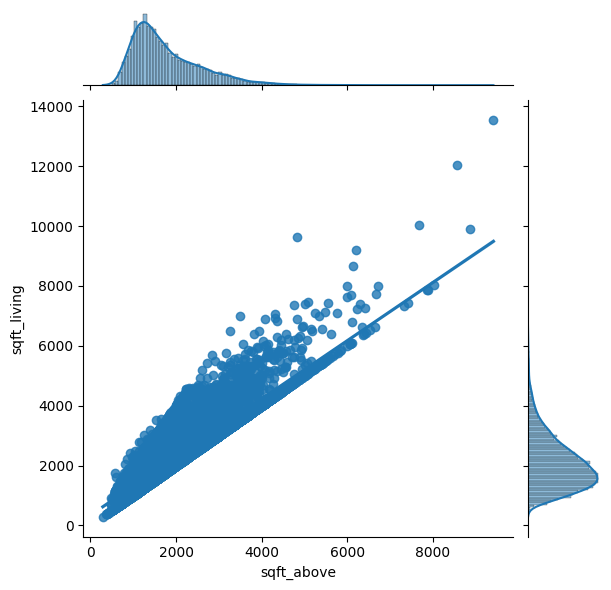

In [196]:
sns.jointplot(data=df, x='sqft_above', y='sqft_living', kind='reg');

Чем больше общая жилая площадь дома, тем больше будет площади "выше уровня земли" в доме.

2. Зависимость размера жилой площади дома от конструкции здания и дизайна.

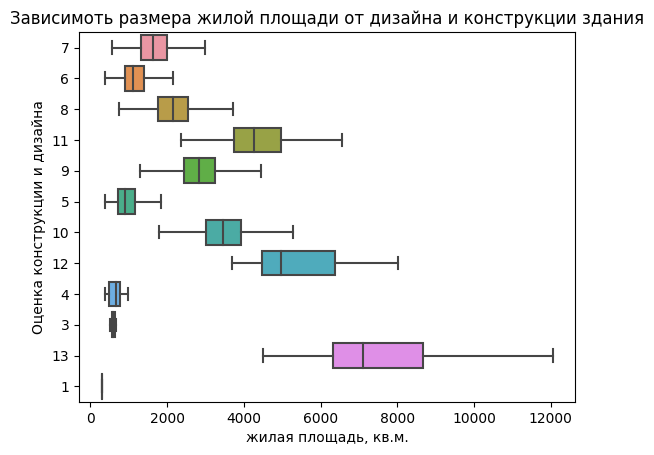

In [197]:
sns.boxplot(x=df['sqft_living'], y=df['grade'].astype('str'), whis=1.5, showfliers=False);
plt.xlabel('жилая площадь, кв.м.')
plt.ylabel('Оценка конструкции и дизайна')
plt.title('Зависимоть размера жилой площади от дизайна и конструкции здания');

В домах с самой высокой оценкой конструкции и дизайна самая большая жилая площадь.

3. Зависимость стоимости дома от оценки за конструкцию и дизайн дома.

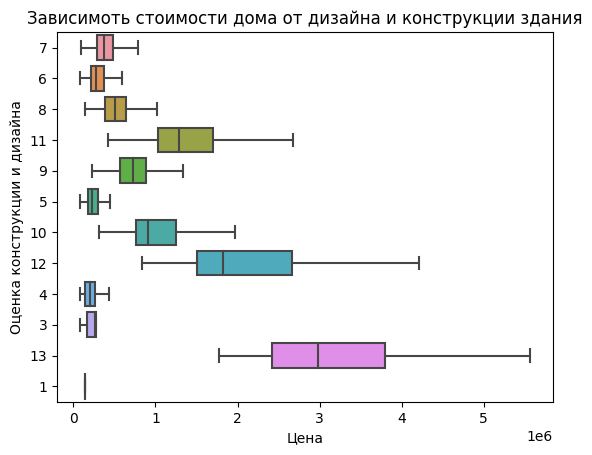

In [198]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5, showfliers=False);
plt.xlabel('Цена')
plt.ylabel('Оценка конструкции и дизайна')
plt.title('Зависимоть стоимости дома от дизайна и конструкции здания');

Дома с высокой оценкой конструкции и дизайна имеют бОльшую стоиомсть.

4. Зависимость количества спален от квадратуры жилой площади.

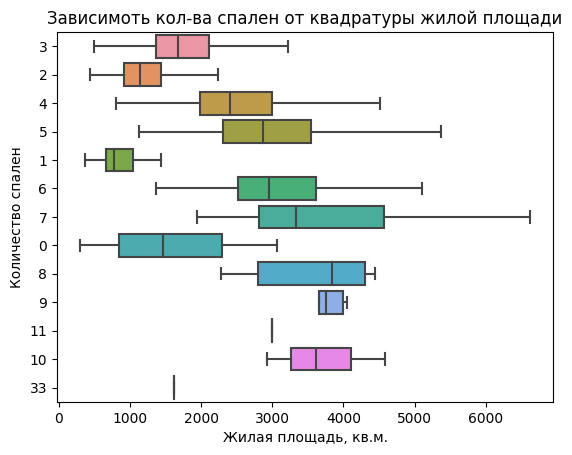

In [219]:
sns.boxplot(x=df['sqft_living'], y=df['bedrooms'].astype('str'), whis=1.5, showfliers=False);
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Количество спален')
plt.title('Зависимоть кол-ва спален от квадратуры жилой площади');

Наибольшее количество спален в домах с жилой площадью от 3000 до 4000кв.м.

5. Зависимость цены на дом от квадратуры жилой площади:

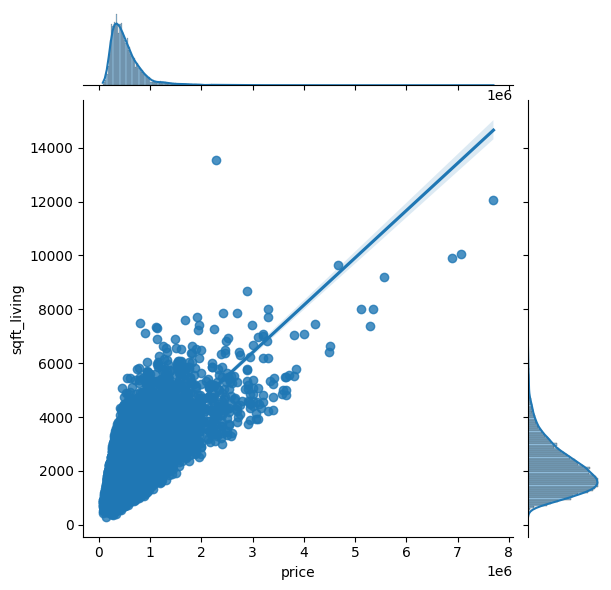

In [155]:
sns.jointplot(data=df, x='price', y='sqft_living', kind='reg');

Чем больше площадь жилой площади дома, тем дороже дом стоит (цена больше).